## Regressão Logística: UTI COVID

In [8]:
import pandas as pd 

df = pd.read_csv('covid_ml-2-2.csv',sep = ';',encoding='latin-1')

In [9]:
df.head()

,id,sexo,data_entrada,pneumonia,gravidez,diabetes,asma,imunodeficiencia,hipertensão,outra doença,cardiovascular,obesidade,renal_crônico,tabaco,contate outro covid,UTI
0,16169f,2,04/05/2020,2,3,2,2,2,2,2,2,2,2,2,2,3
1,1009bf,2,19/03/2020,2,3,2,2,2,2,2,2,2,2,2,3,3
2,167386,1,06/04/2020,2,2,2,2,2,2,2,2,1,2,2,3,2
3,0b5948,2,17/04/2020,1,3,2,2,2,2,2,2,2,2,2,3,2
4,0d01b5,1,13/04/2020,2,2,1,2,2,1,2,1,2,2,2,3,2


In [10]:
df.apply(lambda x : sum(x.isnull()), axis=0)

id                     0
sexo                   0
data_entrada           0
pneumonia              0
gravidez               0
diabetes               0
asma                   0
imunodeficiencia       0
hipertensão            0
outra doença           0
cardiovascular         0
obesidade              0
renal_crônico          0
tabaco                 0
contate outro covid    0
UTI                    0
dtype: int64

In [11]:
for i in df.columns:
    print(i,df[i].unique())

id ['16169f' '1009bf' '167386' ... '1beb81' '16fb02' '0021c9']
sexo [2 1]
data_entrada ['04/05/2020' '19/03/2020' '06/04/2020' '17/04/2020' '13/04/2020'
 '16/04/2020' '22/04/2020' '21/05/2020' '23/04/2020' '29/04/2020'
 '02/05/2020' '25/05/2020' '07/06/2020' '20/06/2020' '24/06/2020'
 '30/04/2020' '05/05/2020' '12/05/2020' '19/04/2020' '02/06/2020'
 '25/04/2020' '15/05/2020' '27/04/2020' '01/04/2020' '22/06/2020'
 '21/04/2020' '24/04/2020' '20/04/2020' '28/04/2020' '26/04/2020'
 '19/06/2020' '31/03/2020' '03/04/2020' '14/04/2020' '12/04/2020'
 '29/03/2020' '06/05/2020' '11/06/2020' '10/06/2020' '02/04/2020'
 '19/05/2020' '05/06/2020' '17/06/2020' '10/04/2020' '03/05/2020'
 '16/06/2020' '30/03/2020' '15/04/2020' '08/06/2020' '15/06/2020'
 '25/03/2020' '25/06/2020' '08/04/2020' '27/05/2020' '20/05/2020'
 '01/06/2020' '18/06/2020' '07/05/2020' '08/05/2020' '29/05/2020'
 '07/04/2020' '11/04/2020' '23/03/2020' '11/05/2020' '18/04/2020'
 '17/05/2020' '22/05/2020' '05/04/2020' '23/06/2020' '2

In [12]:
## Os valores >= 3 são valores sem resposta (NULOS)

Para o primeiro modelo, iremos remover somente os NULOS da variável dependente(UTI).
Para as demais variaveis, como 3 e 98 significam a mesma coisa (NULOS) irei substituir 98 por 3 

In [13]:
df = df.replace(98,3)

#### Removendo os registros em que UTI = 3 (NULO)

In [14]:
df = df[df['UTI']!=3]

#### Removendo a variavel ID

In [15]:
del df['id']

A variável data pode conter informações importantes, e portanto seria interessante criar uma lógica para usá-la no modelo.
Mas para o primeiro modelo, irei somente removê-la e ver como o modelo performa.

In [16]:
del df['data_entrada']

### Criando Registros Artificialmente

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Venda ou Nao'}, xlabel='UTI', ylabel='count'>

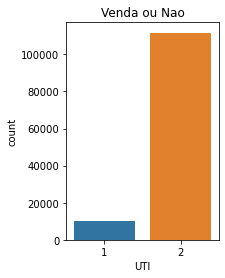

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplot(1,2,2)
plt.title('Venda ou Nao')
sns.countplot(df['UTI'])

In [18]:
df.iloc[:,0:13].head()

,sexo,pneumonia,gravidez,diabetes,asma,imunodeficiencia,hipertensão,outra doença,cardiovascular,obesidade,renal_crônico,tabaco,contate outro covid
2,1,2,2,2,2,2,2,2,2,1,2,2,3
3,2,1,3,2,2,2,2,2,2,2,2,2,3
4,1,2,2,1,2,2,1,2,1,2,2,2,3
5,2,1,3,1,2,2,2,2,2,2,2,2,3
6,2,2,3,2,2,2,1,2,2,2,2,2,3


In [20]:
df.iloc[:,13]

2         2
3         2
4         2
5         1
6         2
         ..
566584    2
566590    1
566591    1
566593    2
566599    2
Name: UTI, Length: 121788, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


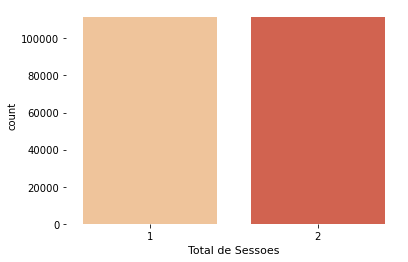

In [21]:
import imblearn
from imblearn.over_sampling import SMOTE

seed = 14

x = df.iloc[:,0:13]
y = df.iloc[:,13]

smote_bal = SMOTE(random_state = seed)

x_res,y_res = smote_bal.fit_resample(x,y)

x = x_res
y = y_res


sns.countplot(y_res, palette = 'OrRd')
plt.box(False)
plt.xlabel("Receita Não (0) / Sim(1)", fontsize = 11)
plt.xlabel("Total de Sessoes", fontsize = 11)
plt.show()

### Dividindo o Dataset entre Treino e Teste 

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

In [32]:
## Padronizando
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

### Criando o Primeiro Modelo

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
modelo1 = LogisticRegression()
modelo1.fit(x_train,y_train)

LogisticRegression()

In [36]:
p1_train = modelo1.predict(x_train)

#### Acuracia para os dados de Treino

In [37]:
import numpy as np
acc1_train = np.mean(p1_train == y_train)
print(round(acc1_train*100,2),'%')

66.56 %


In [38]:
## Matriz de Confusão

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train,  p1_train))

[[53047 25207]
 [27072 51020]]


#### Acuracia para os dados de Teste

In [39]:
p1_test = modelo1.predict(x_test)
acc1_test = np.mean(p1_test == y_test)
print(round(acc1_test*100,2),'%')

66.19 %


In [40]:
### Matriz de Confusão

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, p1_test))

[[22553 10869]
 [11783 21801]]


In [41]:
df['UTI'].value_counts()

2    111676
1     10112
Name: UTI, dtype: int64

Ao aplicar o imblearn, conseguimos remover o viés do modelo, porém a acurácia não foi boa. Entretanto, nao foi caracterizado overfitting.

### Modelo 2 
##### Observações:
        * Removendo registros com dados nulos para qualquer variável ( nao somente para a variavel UTI)
        * Removendo a variavel data_entrada

In [42]:
df2 = pd.read_csv('covid_ml-2-2.csv',sep = ';',encoding='latin-1')

In [43]:
df2 = df2.drop(axis = 1, columns = ['id','data_entrada'])

In [44]:
for i in df2.columns:
    print(i,df2[i].unique())

sexo [2 1]
pneumonia [2 1 3]
gravidez [ 3  2  1 98]
diabetes [ 2  1 98]
asma [ 2  1 98]
imunodeficiencia [ 2  1 98]
hipertensão [ 2  1 98]
outra doença [ 2  1 98]
cardiovascular [ 2  1 98]
obesidade [ 2  1 98]
renal_crônico [ 2  1 98]
tabaco [ 2  1 98]
contate outro covid [2 3 1]
UTI [3 2 1]


In [45]:
df2 = df2.replace(98,3)

#### Removendo os registros NULOS (=3)

In [46]:
for i in df2.columns:
    df2 = df2[df2[i]!=3]

In [47]:
for i in df2.columns:
    print(i,df2[i].unique())

sexo [1]
pneumonia [2 1]
gravidez [2 1]
diabetes [2 1]
asma [2 1]
imunodeficiencia [2 1]
hipertensão [2 1]
outra doença [2 1]
cardiovascular [2 1]
obesidade [2 1]
renal_crônico [2 1]
tabaco [2 1]
contate outro covid [1 2]
UTI [2 1]


#### Após remover os registros que contiam alguma variável NULA, a váriavel sexo passou a ter somente o valor 1, então não faz sentido usá-la nesse modelo

In [26]:
df2 = df2.drop(axis = 1, columns ='sexo')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Venda ou Nao'}, xlabel='UTI', ylabel='count'>

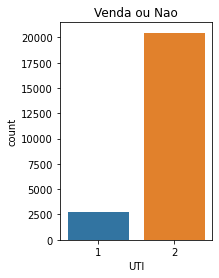

In [49]:
### Criando Registros
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplot(1,2,2)
plt.title('Venda ou Nao')
sns.countplot(df2['UTI'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


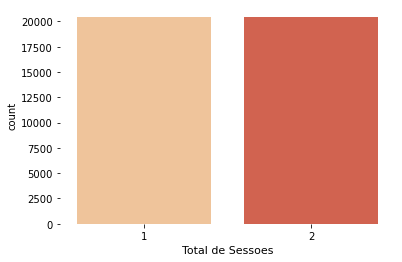

In [51]:
seed = 14

x = df2.iloc[:,0:13]
y = df2.iloc[:,13]

smote_bal = SMOTE(random_state = seed)

x_res,y_res = smote_bal.fit_resample(x,y)

x = x_res
y = y_res


sns.countplot(y_res, palette = 'OrRd')
plt.box(False)
plt.xlabel("Receita Não (0) / Sim(1)", fontsize = 11)
plt.xlabel("Total de Sessoes", fontsize = 11)
plt.show()

In [52]:
from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(x,y,test_size = 0.3)

In [53]:
## Padronizando
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train2)
x_test2 = sc.fit_transform(x_test2)

In [54]:
modelo2 = LogisticRegression()
modelo2.fit(x_train2,y_train2)

LogisticRegression()

#### Acurácia para os dados de Treino

In [55]:
p2_train = modelo2.predict(x_train2)
acc2_train = np.mean(p2_train == y_train2)
print(round(acc2_train*100,2),'%')
print(confusion_matrix(y_train2,p2_train))

58.9 %
[[11404  2882]
 [ 8892  5467]]


#### Acurácia para os dados de Teste

In [56]:
p2_test = modelo2.predict(x_test2)
acc2_test = np.mean(p2_test == y_test2)
print(round(acc2_test*100,2),'%')
print(confusion_matrix(y_test2,p2_test))

59.16 %
[[4935 1240]
 [3774 2328]]


##### O Modelo 2 apresentou um comportamento semelhante ao modelo 1, porem com uma acurácia pior.


### 

### Modelo 3
#### Consideracões:
                    * Assim como no modelo 1, iremos remover somente os registros que possuem UTI nulo
                    * Aplicaremos uma tratativa para o campo de data transformando ele em semana do ano

In [59]:
df3 = pd.read_csv('covid_ml-2-2.csv',sep = ';',encoding='latin-1')

In [60]:
for i in df3.columns:
    print(i,df3[i].unique())

id ['16169f' '1009bf' '167386' ... '1beb81' '16fb02' '0021c9']
sexo [2 1]
data_entrada ['04/05/2020' '19/03/2020' '06/04/2020' '17/04/2020' '13/04/2020'
 '16/04/2020' '22/04/2020' '21/05/2020' '23/04/2020' '29/04/2020'
 '02/05/2020' '25/05/2020' '07/06/2020' '20/06/2020' '24/06/2020'
 '30/04/2020' '05/05/2020' '12/05/2020' '19/04/2020' '02/06/2020'
 '25/04/2020' '15/05/2020' '27/04/2020' '01/04/2020' '22/06/2020'
 '21/04/2020' '24/04/2020' '20/04/2020' '28/04/2020' '26/04/2020'
 '19/06/2020' '31/03/2020' '03/04/2020' '14/04/2020' '12/04/2020'
 '29/03/2020' '06/05/2020' '11/06/2020' '10/06/2020' '02/04/2020'
 '19/05/2020' '05/06/2020' '17/06/2020' '10/04/2020' '03/05/2020'
 '16/06/2020' '30/03/2020' '15/04/2020' '08/06/2020' '15/06/2020'
 '25/03/2020' '25/06/2020' '08/04/2020' '27/05/2020' '20/05/2020'
 '01/06/2020' '18/06/2020' '07/05/2020' '08/05/2020' '29/05/2020'
 '07/04/2020' '11/04/2020' '23/03/2020' '11/05/2020' '18/04/2020'
 '17/05/2020' '22/05/2020' '05/04/2020' '23/06/2020' '2

In [61]:
df3 = df3.replace(98,3)

#### Criando uma função que retorna a semana do ano.

In [62]:
def SemanaDoAno(s):
    ano = int(s[6:])
    mes = int(s[4])
    dia = int(s[0:2])
    
    import datetime
    semana = int(datetime.date(ano,mes,dia).strftime("%U"))
    return semana

#### Criando coluna Nova: semana_do_ano

In [63]:
df3['semana_do_ano'] = df3['data_entrada'].map(SemanaDoAno)

#### Dropando colunas que não serão usadas

In [64]:
df3 = df3.drop(axis = 1,columns = ['id','data_entrada'])

#### Removendo os registros com UTI NULO (3)

In [65]:
df3 = df3[df3['UTI']!=3]

#### Criando registros Artificialmente

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Venda ou Nao'}, xlabel='UTI', ylabel='count'>

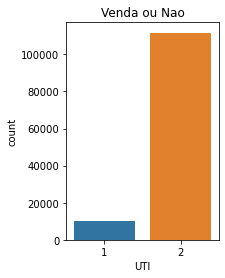

In [67]:
plt.subplot(1,2,2)
plt.title('Venda ou Nao')
sns.countplot(df3['UTI'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


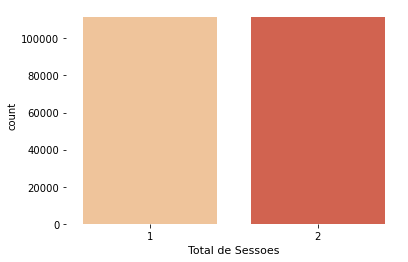

In [68]:
seed = 14

x = df3.iloc[:,0:13]
y = df3.iloc[:,13]

smote_bal = SMOTE(random_state = seed)

x_res,y_res = smote_bal.fit_resample(x,y)

x = x_res
y = y_res


sns.countplot(y_res, palette = 'OrRd')
plt.box(False)
plt.xlabel("Receita Não (0) / Sim(1)", fontsize = 11)
plt.xlabel("Total de Sessoes", fontsize = 11)
plt.show()

In [69]:
from sklearn.model_selection import train_test_split
x_train3, x_test3, y_train3, y_test3 = train_test_split(x,y,test_size = 0.3)

In [87]:
## Padronizando
sc = StandardScaler()
x_train3 = sc.fit_transform(x_train3)
x_test3 = sc.fit_transform(x_test3)

In [88]:
modelo3 = LogisticRegression(solver='lbfgs', max_iter = 1000 )
modelo3.fit(x_train3,y_train3)

LogisticRegression(max_iter=1000)

In [89]:
p3_train = modelo3.predict(x_train3)
acc3_train = np.mean(p3_train == y_train3)
print(round(acc3_train*100,2),'%')
print(confusion_matrix(y_train3, p3_train))

66.39 %
[[53142 25004]
 [27546 50654]]


In [90]:
p3_test = modelo3.predict(x_test3)
acc3_test = np.mean(p3_test == y_test3)
print(round(acc3_test*100,2),'%')
print(confusion_matrix(y_test3, p3_test))

66.72 %
[[22808 10722]
 [11577 21899]]


#### O resultado foi muito próximo ao primeiro modelo. Faremos um último modelo transformando a data em mes

### Modelo 4 :
#### Consideracões:
                    * Assim como no modelo 1, iremos remover somente os registros que possuem UTI nulo
                    * Aplicaremos uma tratativa para o campo de data transformando ele em mês.

In [74]:
df4 = pd.read_csv('covid_ml-2-2.csv',sep = ';',encoding='latin-1')

In [75]:
for i in df4.columns:
    print(i,df4[i].unique())

id ['16169f' '1009bf' '167386' ... '1beb81' '16fb02' '0021c9']
sexo [2 1]
data_entrada ['04/05/2020' '19/03/2020' '06/04/2020' '17/04/2020' '13/04/2020'
 '16/04/2020' '22/04/2020' '21/05/2020' '23/04/2020' '29/04/2020'
 '02/05/2020' '25/05/2020' '07/06/2020' '20/06/2020' '24/06/2020'
 '30/04/2020' '05/05/2020' '12/05/2020' '19/04/2020' '02/06/2020'
 '25/04/2020' '15/05/2020' '27/04/2020' '01/04/2020' '22/06/2020'
 '21/04/2020' '24/04/2020' '20/04/2020' '28/04/2020' '26/04/2020'
 '19/06/2020' '31/03/2020' '03/04/2020' '14/04/2020' '12/04/2020'
 '29/03/2020' '06/05/2020' '11/06/2020' '10/06/2020' '02/04/2020'
 '19/05/2020' '05/06/2020' '17/06/2020' '10/04/2020' '03/05/2020'
 '16/06/2020' '30/03/2020' '15/04/2020' '08/06/2020' '15/06/2020'
 '25/03/2020' '25/06/2020' '08/04/2020' '27/05/2020' '20/05/2020'
 '01/06/2020' '18/06/2020' '07/05/2020' '08/05/2020' '29/05/2020'
 '07/04/2020' '11/04/2020' '23/03/2020' '11/05/2020' '18/04/2020'
 '17/05/2020' '22/05/2020' '05/04/2020' '23/06/2020' '2

In [76]:
df4 = df4.replace(98,3)

In [77]:
for i in df4.columns:
    print(i,df4[i].unique())

id ['16169f' '1009bf' '167386' ... '1beb81' '16fb02' '0021c9']
sexo [2 1]
data_entrada ['04/05/2020' '19/03/2020' '06/04/2020' '17/04/2020' '13/04/2020'
 '16/04/2020' '22/04/2020' '21/05/2020' '23/04/2020' '29/04/2020'
 '02/05/2020' '25/05/2020' '07/06/2020' '20/06/2020' '24/06/2020'
 '30/04/2020' '05/05/2020' '12/05/2020' '19/04/2020' '02/06/2020'
 '25/04/2020' '15/05/2020' '27/04/2020' '01/04/2020' '22/06/2020'
 '21/04/2020' '24/04/2020' '20/04/2020' '28/04/2020' '26/04/2020'
 '19/06/2020' '31/03/2020' '03/04/2020' '14/04/2020' '12/04/2020'
 '29/03/2020' '06/05/2020' '11/06/2020' '10/06/2020' '02/04/2020'
 '19/05/2020' '05/06/2020' '17/06/2020' '10/04/2020' '03/05/2020'
 '16/06/2020' '30/03/2020' '15/04/2020' '08/06/2020' '15/06/2020'
 '25/03/2020' '25/06/2020' '08/04/2020' '27/05/2020' '20/05/2020'
 '01/06/2020' '18/06/2020' '07/05/2020' '08/05/2020' '29/05/2020'
 '07/04/2020' '11/04/2020' '23/03/2020' '11/05/2020' '18/04/2020'
 '17/05/2020' '22/05/2020' '05/04/2020' '23/06/2020' '2

In [78]:
df4 = df4[df4['UTI']!=3]

#### Função para pegar o mês da data

In [79]:
def getMes(s):
    return int(s[4])

In [80]:
df4['mes'] = df4['data_entrada'].map(getMes)

In [81]:
df4 = df4.drop(axis = 1, columns = ['id','data_entrada'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Venda ou Nao'}, xlabel='UTI', ylabel='count'>

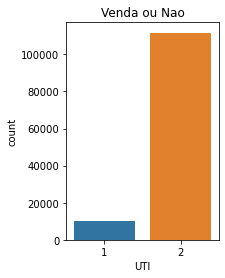

In [83]:
## Criando registros

plt.subplot(1,2,2)
plt.title('Venda ou Nao')
sns.countplot(df3['UTI'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


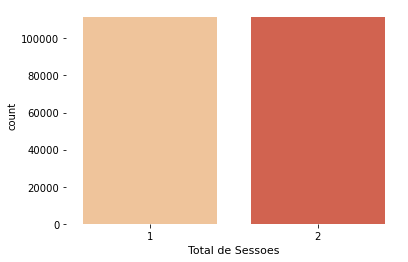

In [84]:
seed = 14

x = df4.iloc[:,0:13]
y = df4.iloc[:,13]

smote_bal = SMOTE(random_state = seed)

x_res,y_res = smote_bal.fit_resample(x,y)

x = x_res
y = y_res


sns.countplot(y_res, palette = 'OrRd')
plt.box(False)
plt.xlabel("Receita Não (0) / Sim(1)", fontsize = 11)
plt.xlabel("Total de Sessoes", fontsize = 11)
plt.show()     

In [92]:
from sklearn.model_selection import train_test_split
x_train4, x_test4, y_train4, y_test4 = train_test_split(x,y,test_size = 0.3)

In [93]:
## Padronizando
sc = StandardScaler()
x_train4 = sc.fit_transform(x_train4)
x_test4 = sc.fit_transform(x_test4)

In [94]:
modelo4 = LogisticRegression(solver = 'lbfgs', max_iter = 1000)
modelo4.fit(x_train4,y_train4)

LogisticRegression(max_iter=1000)

In [95]:
p4_train = modelo4.predict(x_train4)
acc4_train = np.mean(p4_train == y_train4)
print(round(acc4_train*100,2),'%')
print(confusion_matrix(y_train4, p4_train))

66.48 %
[[52902 25238]
 [27173 51033]]


In [96]:
p4_test = modelo4.predict(x_test4)
acc4_test = np.mean(p4_test == y_test4)
print(round(acc4_test*100,2),'%')
print(confusion_matrix(y_test4, p4_test))

66.52 %
[[22755 10781]
 [11653 21817]]


#### O resultado próximo aos modelos 1 e 3, isso indica que a variável de data não está interferindo no modelo e pode ser descartada. 

### Conclusão: 
Os modelos apresentaram uma acurácia ruim (proximo a 66%). Porém ao aplicar o Imblearn, conseguimos remover o viés do modelo que antes estava assumindo o valor 2 para a variavel UTI. 

Isso significa que os modelos estão explicando mal a variável dependente, e para melhorá-los precisariamos de mais dados. Uma hipotese é que os registros não informados (UTI =3) fossem imporantes para melhorar a performance dos modelos. 